# Offshore Wind Structure - Exercise 2 (Economics)

The main objective is the exploration of the economic viability of an offshore wind project by means of different economic tools.


In [107]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data
The wind farm is comprised of 25 Vestas V162-5.6 MW

In [76]:

P_rated = 5.6 # MW

c_f_init = 0.5

CapEx     = 4.0  # MEur/MW
OpEx      = 35.0 # Eur/MWh
DecomEx   = 5.0  # MEur/OWF
disc_rate = 0.04 # -
E_price   = 0.1  # Eur/kWh

lifetime = 25 # years

OpEx    = OpEx*1e-6    # MEur/MWh
E_price = E_price*1e-3 # MEur/MWh

In [77]:
# mount a DataFrame with the basic information
i = np.linspace(0, lifetime, num=lifetime+1, dtype=int)
df = pd.DataFrame(
    index = i
)
df.index.names = ['year']

t_y = 365*24               # hours in a year
AEP = P_rated*c_f_init*t_y # Annual Energy Production
Revenue_annual = AEP*E_price # MEur
OpEx_annual    = OpEx*AEP    # MEur

print('Annual Energy of Production:', AEP, 'MWh')
print('Hours in a year:', t_y)

df['CapEx']   = 0.0
df['Revenue'] = Revenue_annual
df['OpEx']    = OpEx_annual

# initial Values
df['CapEx'][0]   = CapEx*P_rated
df['Revenue'][0] = 0.0
df['OpEx'][0]    = 0.0

# df

Annual Energy of Production: 24528.0 MWh
Hours in a year: 8760


## Question 1
Estimation of the Simple Payback Period (SPT).

In [78]:
STP = df['CapEx'].sum()/(Revenue_annual - OpEx_annual)

print('The Simple Payback Time is', STP, 'years')

The Simple Payback Time is 14.049877063575689 years


## Question 2
Computation of the Net Present Value (NPV)

In [79]:
df['discount'] = 1/(1+disc_rate)**i
df['PV'] = (df['Revenue'] - df['OpEx'])*df['discount']

NPV = df['PV'].sum() - CapEx

print("The Net Present Value is", NPV,'MEur')

# df

The Net Present Value is 20.90659449576149 MEur


## Question 3
Estimation of the Levelised Cost of Energy (LCoE).

In [80]:
df['P_Cost']   = (df['CapEx'] + df['OpEx'])*df['discount']
df['P_Energy'] = AEP*df['discount']

LCoE = df['P_Cost'].sum()/df['P_Energy'].sum()*1e6 # Eur/MWh

print('The Leverized Cost of Energy is', LCoE,'Eur/MWh')

The Leverized Cost of Energy is 87.83586723861721 Eur/MWh


## Question 4
Determine the **capacity factor** that will lead to a payback period of 16 years. Additionally, find out the **discount rate** for a payback period of 8 years.

The capacity factor for returning the years in 16 years is: 0.4603881278538812
At the year 8, with a discount ratio of 0.365 , the NPV is 0.005572270207376384 MEur


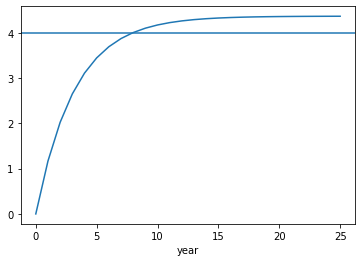

In [88]:
STP = 16 # setting the years for the payback

# computing the capacity factor
c_f = (df['CapEx'].sum()/STP + OpEx_annual)/(E_price*t_y*P_rated)

print('The capacity factor for returning the years in',STP, 'years is:',c_f)

df4 = df.copy(deep=True)

# recoumputing the discount factor
disc_rate = 0.365 # new discount rate (done by try and error)

df4['discount'] = 1/(1+disc_rate)**i # recomputing the discount for each year
df4['PV'] = (df4['Revenue'] - df4['OpEx'])*df4['discount'] # recomputing the present value

NPV_8years = df4['PV'].loc[:8].sum() - CapEx

print("At the year 8, with a discount ratio of",disc_rate, ', the NPV is', NPV_8years,'MEur')
df4['PV'].cumsum().plot()
plt.axhline(CapEx)
plt.show()

## Question 5
Perform a sensitivity analysis to assess how the capacity factor and discount rate affect the results for NPV and LCoE. 

In [97]:
c_f_list =  [0.30, 0.35, 0.4 , 0.45, 0.5 , 0.55,  0.60]
disc_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,  0.07]

df_temp = df.copy(deep=True)

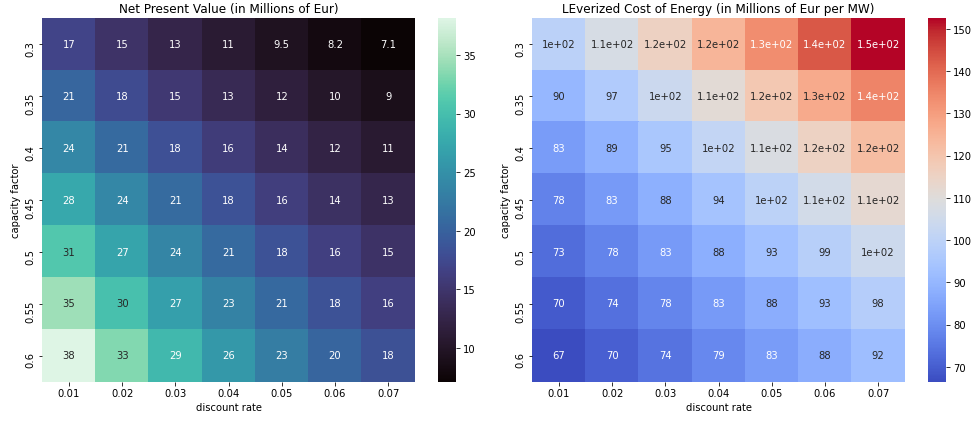

In [134]:
df_sens_NPV  = pd.DataFrame(index=c_f_list, columns=disc_list, dtype=float)
df_sens_LCoE = pd.DataFrame(index=c_f_list, columns=disc_list, dtype=float)

for cf in c_f_list:
    for disc in disc_list:
        AEP = P_rated*cf*t_y # Annual Energy Production
        Revenue_annual = AEP*E_price # MEur
        OpEx_annual    = OpEx*AEP    # MEur

        df_temp['CapEx']   = 0.0
        df_temp['Revenue'] = Revenue_annual
        df_temp['OpEx']    = OpEx_annual

        # initial Values
        df_temp['CapEx'][0]   = CapEx*P_rated
        df_temp['Revenue'][0] = 0.0
        df_temp['OpEx'][0]    = 0.0

        ### on NPV ###
        # (calculation similar to Question 2)
        df_temp['discount'] = 1/(1+disc)**i
        df_temp['PV'] = (df_temp['Revenue'] - df_temp['OpEx'])*df_temp['discount']

        NPV = df_temp['PV'].sum() - CapEx

        # storing the value
        df_sens_NPV.loc[cf, disc] = NPV

        ### on LCoE ###
        # (calculation similar to Question 3)
        df_temp['P_Cost']   = (df_temp['CapEx'] + df_temp['OpEx'])*df_temp['discount']
        df_temp['P_Energy'] = AEP*df_temp['discount']

        LCoE = df_temp['P_Cost'].sum()/df_temp['P_Energy'].sum()*1e6 # Eur/MWh

        df_sens_LCoE.loc[cf, disc] = LCoE

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,6))

# NPV
sns.heatmap(df_sens_NPV, annot=True, ax=axes[0], cmap='mako')
axes[0].set_title('Net Present Value (in Millions of Eur)')
axes[0].set_xlabel('discount rate')
axes[0].set_ylabel('capacity factor')

# LCoE
sns.heatmap(df_sens_LCoE, annot=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title('LEverized Cost of Energy (in Millions of Eur per MW)')
axes[1].set_xlabel('discount rate')
axes[1].set_ylabel('capacity factor')

plt.tight_layout()
plt.show()

## Question 6
Compute SPT, NPV and LCoE assuming that the wind farm will be located in a region where the mean wind speed is approximately 10 m/s. Check the variation of the result if a region with 6 m/s of mean wind speed is selected.

## Question 7
**Tendering**. There is a tender offering for a new offshore wind farm. You can choose an
offshore location in such a way that you achieve a competitive selling price. Yet, your
company would like to ensure at least 20 M€ (present value).